## INTRODUCTION<a id="0"></a>
<hr>
* In this kernel, we will learn how to use matplotlib library.

    * Matplolib library: Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.
    
* If you like it, thank you for you **upvotes**.
* If you have any **question**, I will happy to hear it

<hr>

1. [Importing Matplotlib](#1)
2. [The Matplotlib Object Hierarchy](#2)
3. [Saving Figures to File](#3)
4. [Stylesheets](#4)
5. [Two Interfaces](#5)
    * [MATLAB-style Interface](#6)
    * [Object-oriented interface](#7)
6. [Scatter Plots](#8)
    * [plot](#9)
    * [scatter](#10)
    * [Colorfull scatter plot](#11)
7. [Basic Errorbars](#12)
8. [Histograms, Binnings, and Density](#13)
     * [Colorfull histogram](#14)
9. [Two-Dimensional Histograms and Binnings](#15)
10. [Customizing Plot Legends](#16)
11. [Choosing Elements for the Legend](#17)
12. [Multiple Legends](#18)
13. [Customizing Colorbars](#19)
14. [Multiple Subplots](#20)
15. [Simple Grids of Subplots](#21)
16. [More Complicated Arrangements](#22)
17. [Text and Annotation](#23)
18. [Arrows and Annotation](#24)
19. [Customizing Ticks](#25)
20. [Customizing Matplotlib: Configurations and Stylesheets](#26)
21. [Three-Dimensional Plotting in Matplotlib](#27)
22. [Geographic Data with Basemap](#28)
23. [Quick References](#29)
     * [Line-styles References](#30)
     * [Line styles](#31)
     * [Fill style](#32)
     * [Un-filled markers](#33)
     * [Filled markers](#34)
     * [Special Marker](#35)
     * [Colors](#36)
24. [Matplotlib for Pokemon Dataset](37)
     * [Bar Chart](#38)
     * [Horizontal Bar Chart](#39)
     * [Stacked Bar Chart](#40)
     * [Group Bar Chart](#41)
     * [Basic Pie Chart](#42)
     * [Other Basic Pie Chart](#43)
     * [Pie Chart with Label](#44)
     * [Nested Pie Chart](#45)
     * [Legend Example](#46)
         * [Legend Underside](#47)
         * [Legend Inside](#48)
         * [Legend Inside - 2](#49)
         * [Legend Outside](#50)
     * [Scatter Plot](#51)
     * [Histogram](#52)
     * [Stackplot](#53)
     * [2 Subplot](#54)
     * [3 Subplot](#55)
     * [Color plot bar](#56)
     * [Linear Graph](#57)
     * [Multiple figures](#58)
25. [Conclucion](#59)
26. [Reference](#60)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../input/Pokemon.csv')

## Importing Matplotlib<a id="1"></a>
<mark>[Return Contents](#0)
<hr>

In [2]:
import matplotlib.pyplot as plt

## The Matplotlib Object Hierarchy<a id="2"></a>
<mark>[Return Contents](#0)
<hr>

To make the most of matplotlib, you need to know its hierarchy very well.

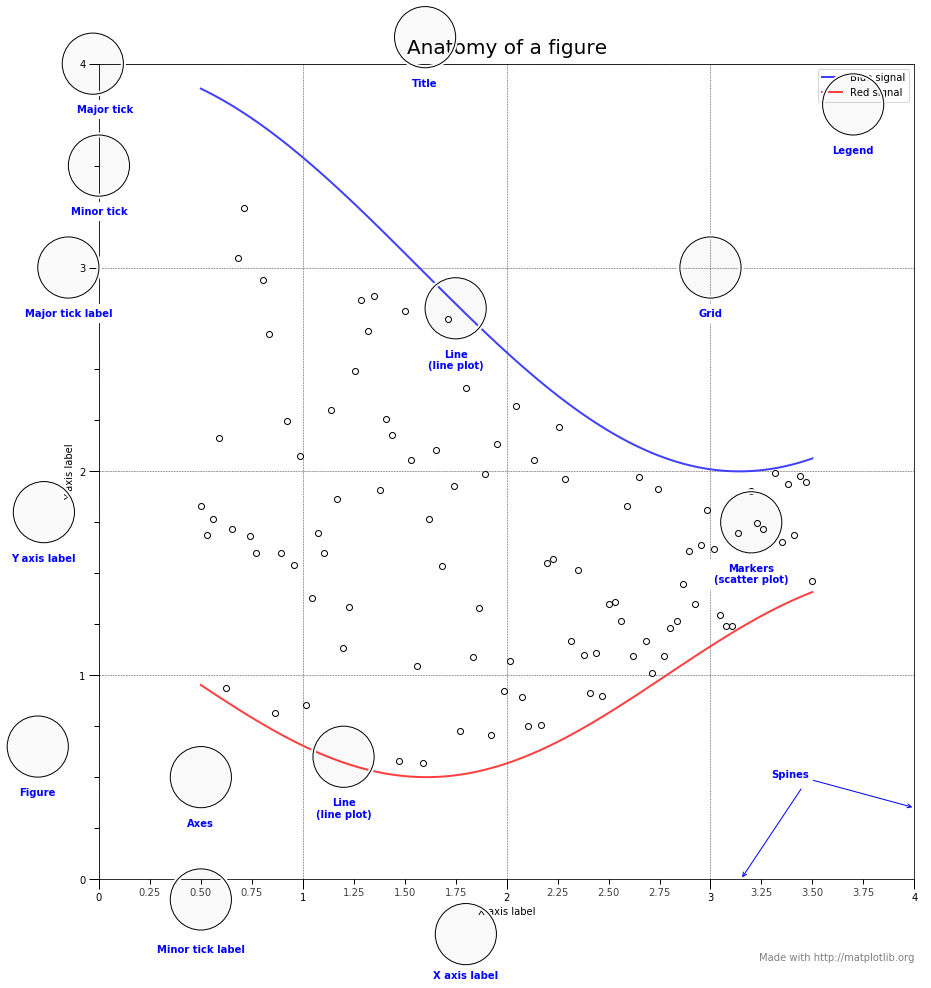

In [3]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

## Saving Figures to File<a id="3"></a>
<mark>[Return Contents](#0)
<hr>

sometimes we want to save Ahmet. To do this, we need to know the recording formats that matpllotlib supports.

In [4]:
fig = plt.figure()
# fig.savefig('my_figure.png') -> This code save the your figure.
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

## Stylesheets<a id="4"></a>
<mark>[Return Contents](#0)
<hr>

there are many styles available in Matplotlib. All of these styles are listed below.

In [5]:
plt.style.available
# plt.style.use('stylename')

['seaborn-poster',
 'seaborn-darkgrid',
 'seaborn-paper',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'fast',
 'seaborn-talk',
 'grayscale',
 'ggplot',
 'fivethirtyeight',
 '_classic_test',
 'seaborn-white',
 'bmh',
 'seaborn-bright',
 'dark_background',
 'Solarize_Light2',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-deep',
 'seaborn-ticks',
 'classic',
 'tableau-colorblind10',
 'seaborn']

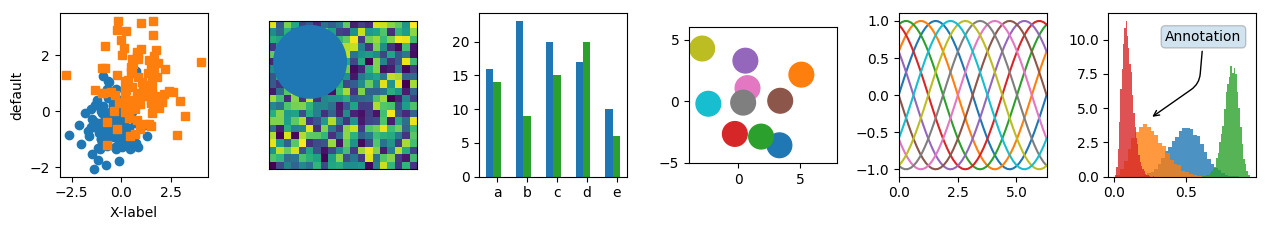

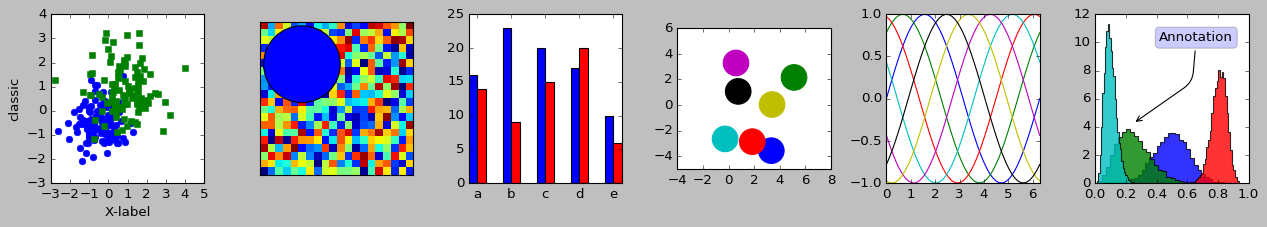

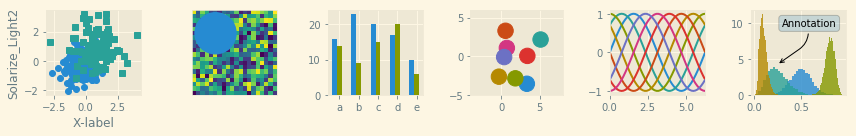

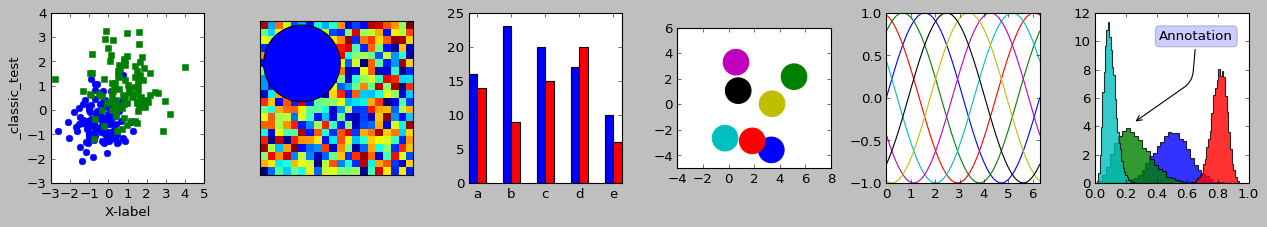

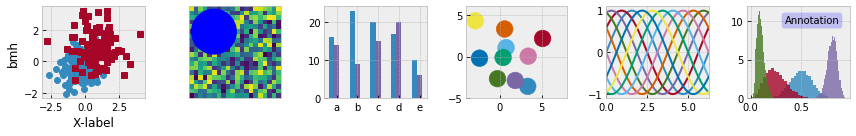

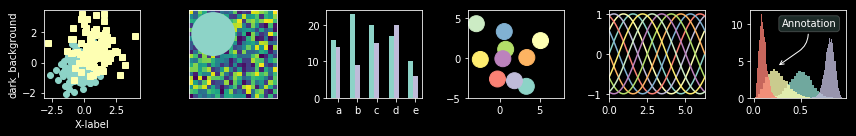

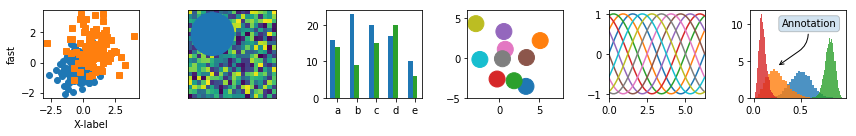

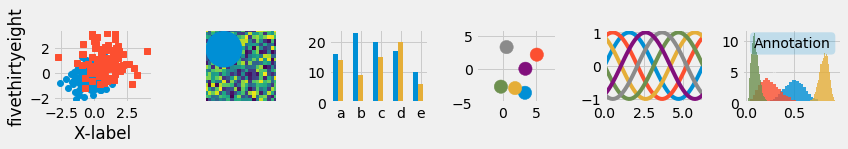

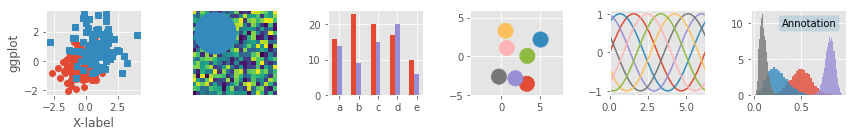

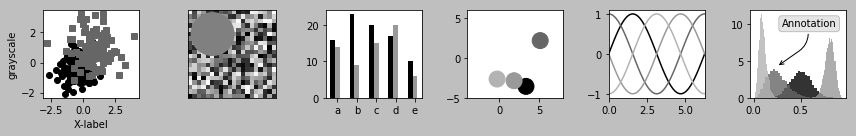

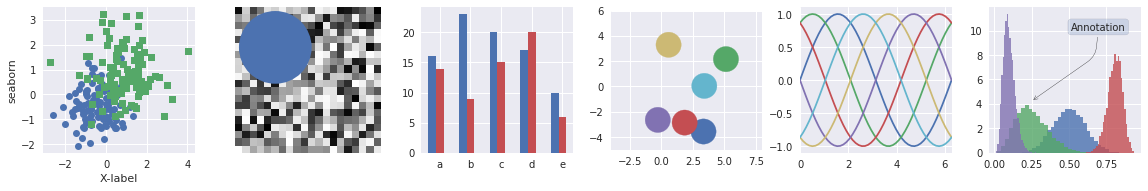

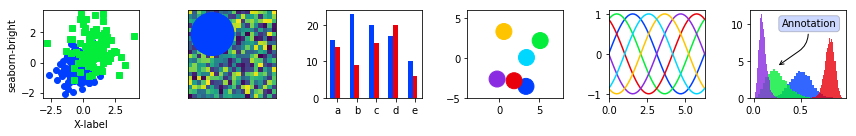

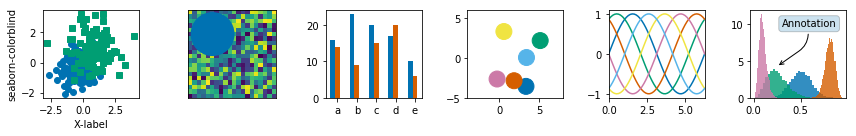

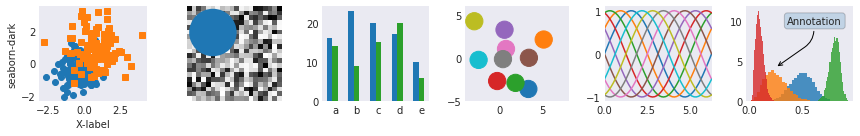

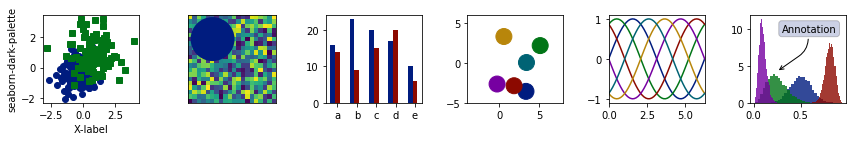

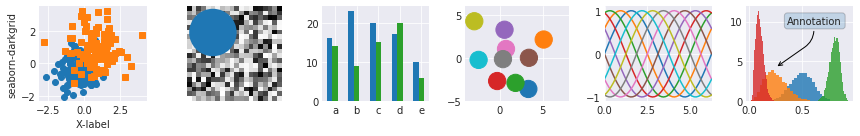

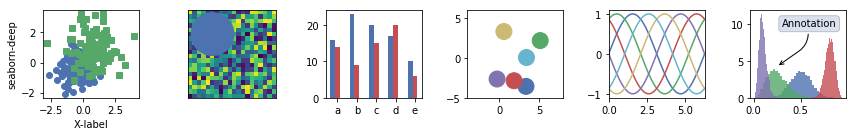

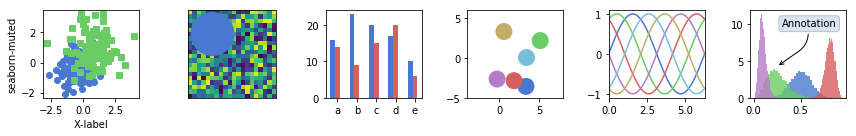

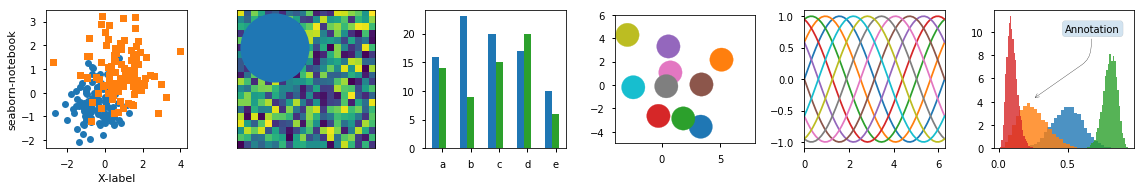

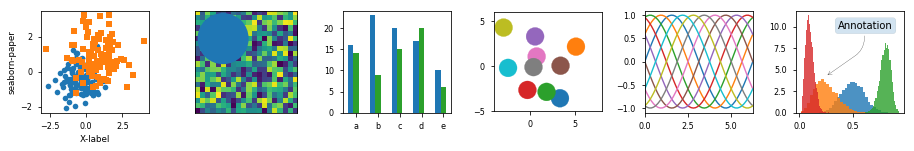

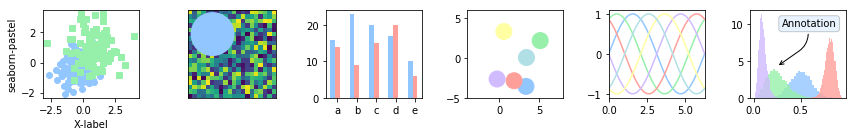

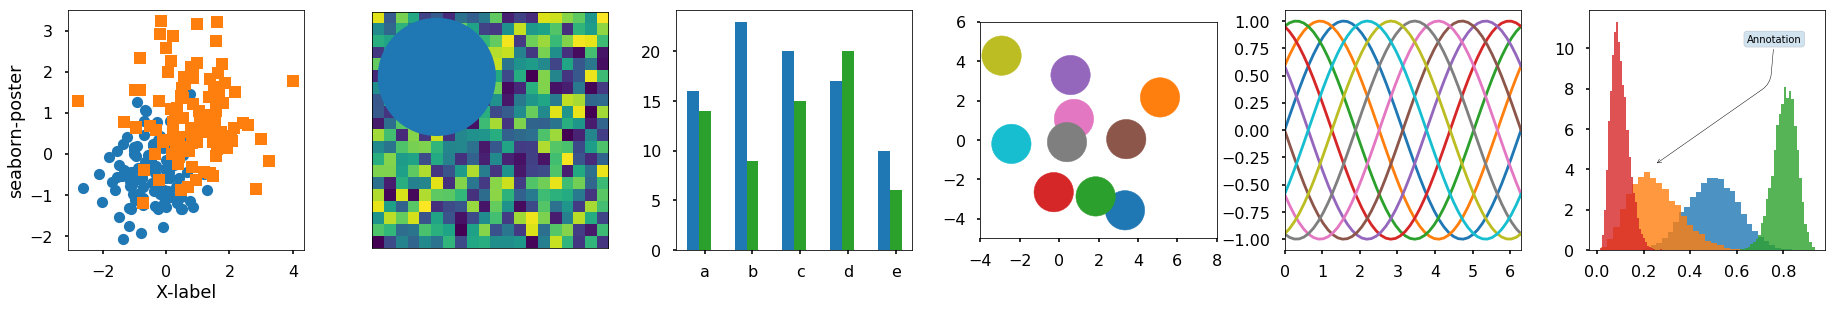

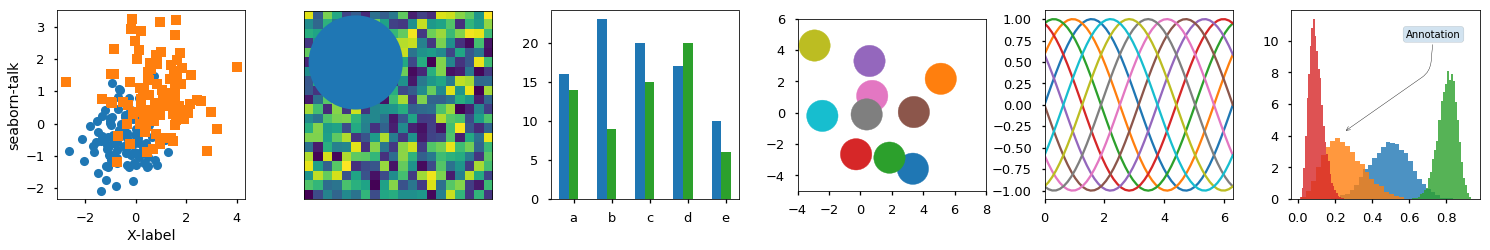

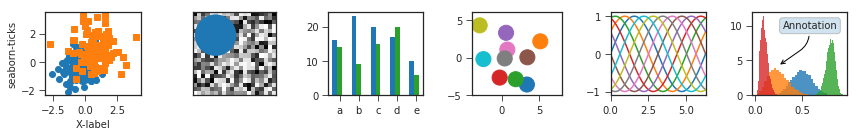

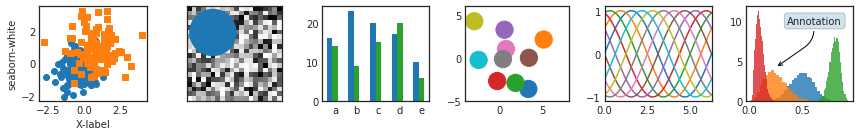

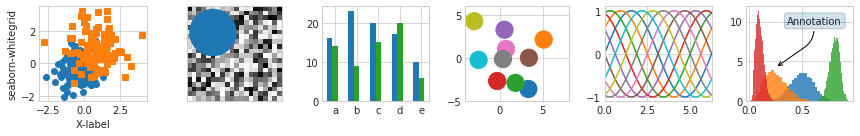

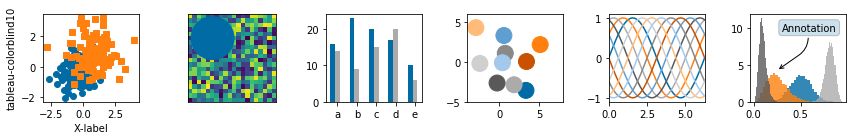

In [6]:
def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot.
    """
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    return ax


def plot_colored_sinusoidal_lines(ax):
    """Plot sinusoidal lines with colors following the style color cycle.
    """
    L = 2 * np.pi
    x = np.linspace(0, L)
    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shift = np.linspace(0, L, nb_colors, endpoint=False)
    for s in shift:
        ax.plot(x, np.sin(x + s), '-')
    ax.set_xlim([x[0], x[-1]])
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels.
    """
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width)
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'], range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch.
    """
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation.
    """
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30, alpha=0.8, normed=True)
    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25), xycoords='data',
                xytext=(0.9, 0.9), textcoords='axes fraction',
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style.
    """
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    # Tweak the figure size to be better suited for a row of numerous plots:
    # double the width and halve the height. NB: use relative changes because
    # some styles may have a figure size different from the default one.
    (fig_width, fig_height) = plt.rcParams['figure.figsize']
    fig_size = [fig_width * 2, fig_height / 2]

    fig, axes = plt.subplots(ncols=6, nrows=1, num=style_label,
                             figsize=fig_size, squeeze=True)
    axes[0].set_ylabel(style_label)

    plot_scatter(axes[0], prng)
    plot_image_and_patch(axes[1], prng)
    plot_bar_graphs(axes[2], prng)
    plot_colored_circles(axes[3], prng)
    plot_colored_sinusoidal_lines(axes[4])
    plot_histograms(axes[5], prng)

    fig.tight_layout()

    return fig


if __name__ == "__main__":

    # Setup a list of all available styles, in alphabetical order but
    # the `default` and `classic` ones, which will be forced resp. in
    # first and second position.
    style_list = list(plt.style.available)  # *new* list: avoids side effects.
    style_list.remove('classic')  # `classic` is in the list: first remove it.
    style_list.sort()
    style_list.insert(0, u'default')
    style_list.insert(1, u'classic')

    # Plot a demonstration figure for every available style sheet.
    for style_label in style_list:
        with plt.style.context(style_label):
            fig = plot_figure(style_label=style_label)

    plt.show()

## Two Interfaces<a id="5"></a>
<mark>[Return Contents](#0)
<hr>

there are two different ways to use MatPlotLib. The first of these is the MATLAB style and the second is the object oriented interface style. Now, let's look at these.

### MATLAB-style Interface<a id="6"></a>
<mark>[Return Contents](#0)
<hr>

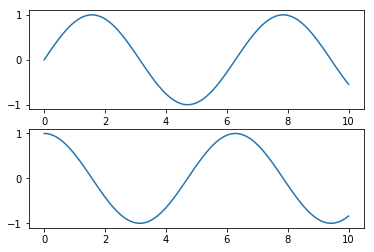

In [7]:
plt.figure()  # create a plot figure
x = np.linspace(0, 10, 100)
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));
plt.show()

### Object-oriented interface<a id="7"></a>
<mark>[Return Contents](#0)
<hr>

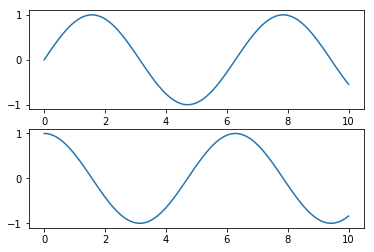

In [8]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Scatter Plots<a id="8"></a>
<mark>[Return Contents](#0)
<hr>

There are different methods and customizations for the scatter plot representation. Let's look at these.

### plot<a id="9"></a>
<mark>[Return Contents](#0)
<hr>

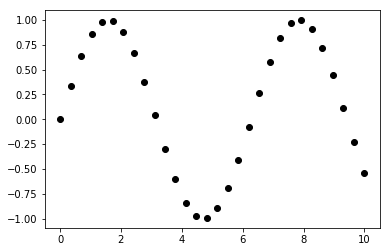

In [9]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');
plt.show()

In [10]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);
plt.show()

In [11]:
plt.plot(x, y, '-ok');
plt.show()

In [12]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

### scatter<a id="10"></a>
<mark>[Return Contents](#0)
<hr>

The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

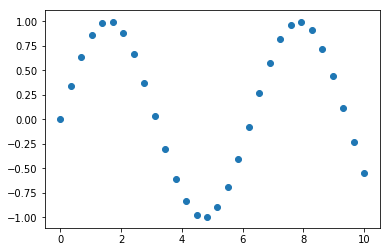

In [13]:
plt.scatter(x, y, marker='o');
plt.show()

**Colorfull scatter plot**<a id="11"></a>
<mark>[Return Contents](#0)
<hr>

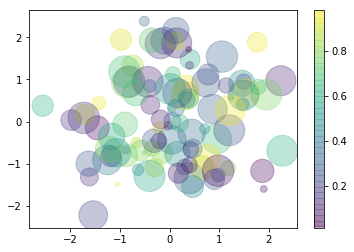

In [14]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

## Basic Errorbars<a id="12"></a>
<mark>[Return Contents](#0)
<hr>

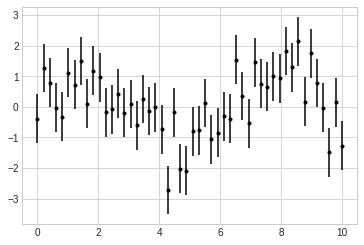

In [15]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

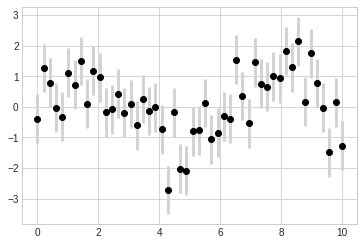

In [16]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',ecolor='lightgray', elinewidth=3, capsize=0);

## Histograms, Binnings, and Density<a id="13"></a>
<mark>[Return Contents](#0)
<hr>

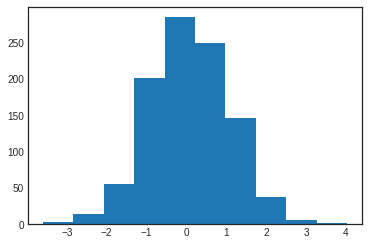

In [17]:
plt.style.use('seaborn-white')

data = np.random.randn(1000)
plt.hist(data);

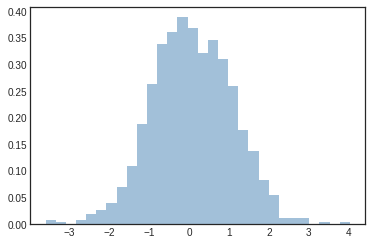

In [18]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.show()

**Colorfull histogram**<a id="14"></a>
<mark>[Return Contents](#0)
<hr>

In [19]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Two-Dimensional Histograms and Binnings<a id="15"></a>
<mark>[Return Contents](#0)
<hr>

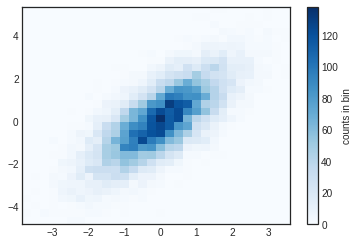

In [20]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

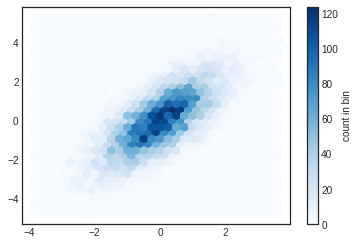

In [21]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## Customizing Plot Legends<a id="16"></a>
<mark>[Return Contents](#0)
<hr>

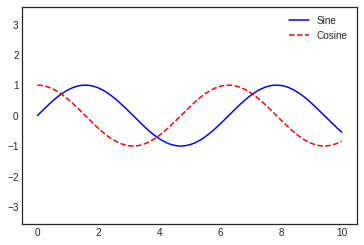

In [22]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

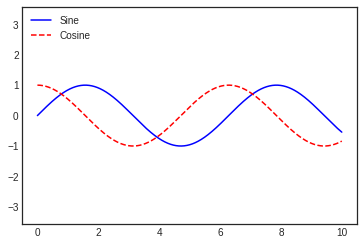

In [23]:
ax.legend(loc='upper left', frameon=False)
fig

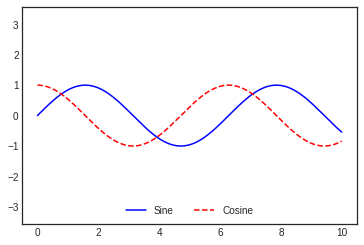

In [24]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

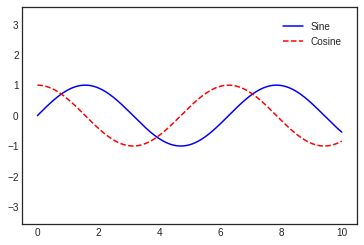

In [25]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## Choosing Elements for the Legend<a id="17"></a>
<mark>[Return Contents](#0)
<hr>

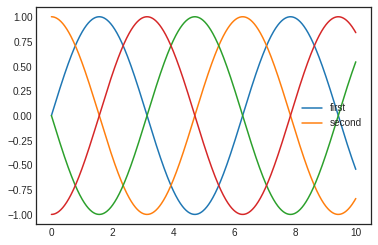

In [26]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

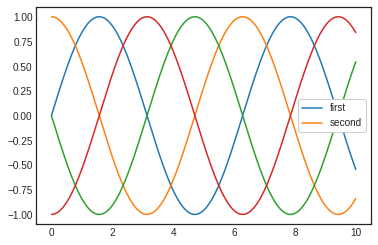

In [27]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## Multiple Legends<a id="18"></a>
<mark>[Return Contents](#0)
<hr>

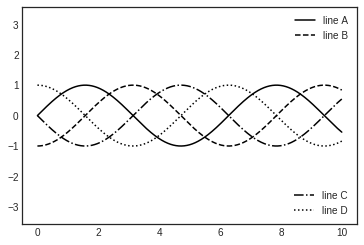

In [28]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

## Customizing Colorbars<a id="19"></a>
<mark>[Return Contents](#0)
<hr>

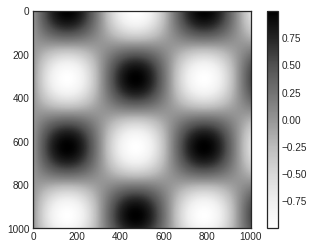

In [29]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

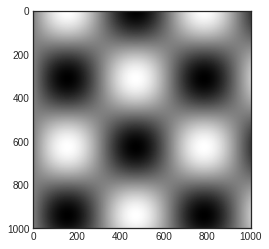

In [30]:
plt.imshow(I, cmap='gray');

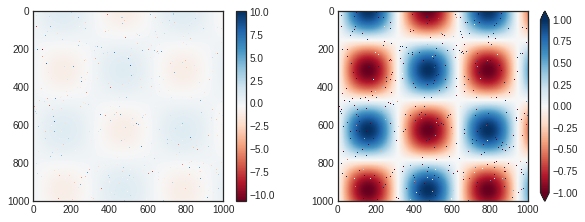

In [31]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

In [32]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

## Multiple Subplots<a id="20"></a>
<mark>[Return Contents](#0)
<hr>

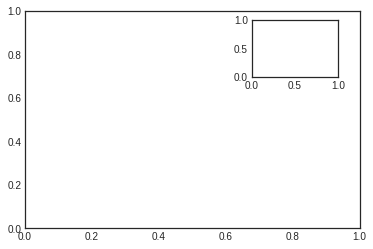

In [33]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

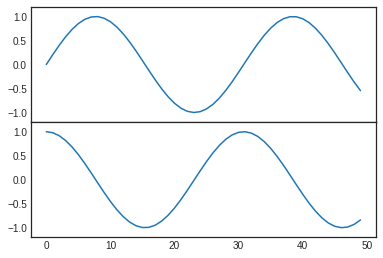

In [34]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## Simple Grids of Subplots<a id="21"></a>
<mark>[Return Contents](#0)
<hr>

In [35]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

In [36]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

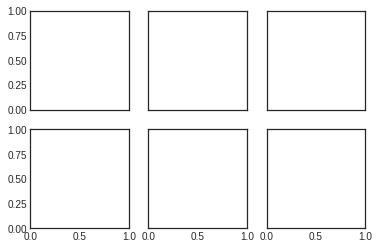

In [37]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

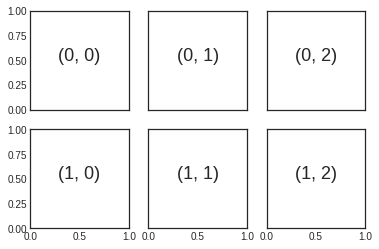

In [38]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

## More Complicated Arrangements<a id="22"></a>
<mark>[Return Contents](#0)
<hr>

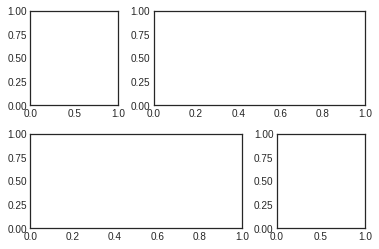

In [39]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

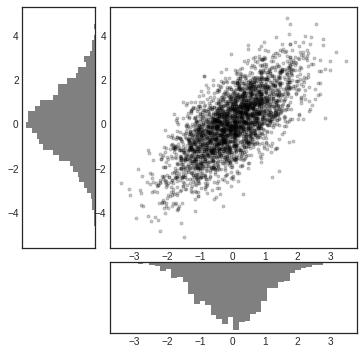

In [40]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## Text and Annotation<a id="23"></a>
<mark>[Return Contents](#0)
<hr>

* ax.transData: Transform associated with data coordinates
* ax.transAxes: Transform associated with the axes (in units of axes dimensions)
* fig.transFigure: Transform associated with the figure (in units of figure dimensions)

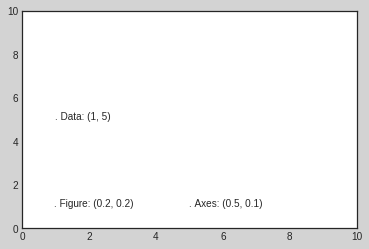

In [41]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

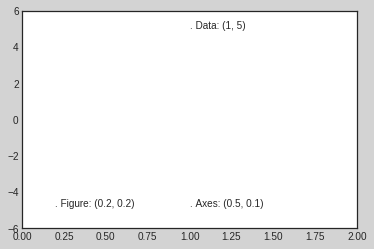

In [42]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation<a id="24"></a>
<mark>[Return Contents](#0)
<hr>

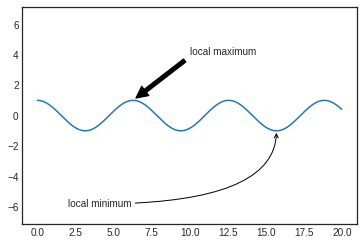

In [43]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

## Customizing Ticks<a id="25"></a>
<mark>[Return Contents](#0)
<hr>

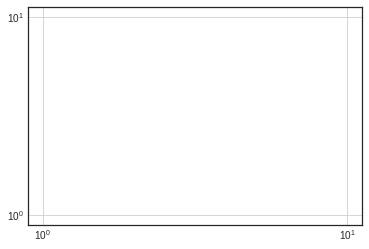

In [44]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

## Customizing Matplotlib: Configurations and Stylesheets<a id="26"></a>
<mark>[Return Contents](#0)
<hr>

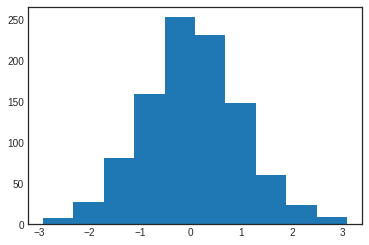

In [45]:
x = np.random.randn(1000)
plt.hist(x);

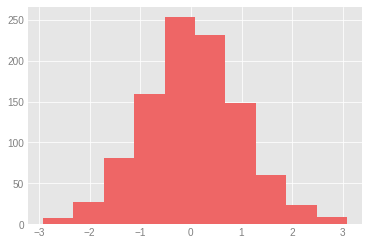

In [46]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.hist(x);

## Three-Dimensional Plotting in Matplotlib<a id="27"></a>
<mark>[Return Contents](#0)
<hr>

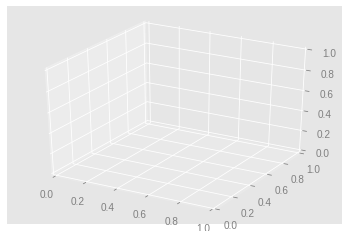

In [47]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

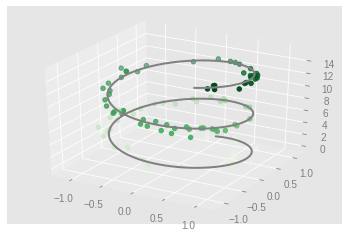

In [48]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Geographic Data with Basemap<a id="28"></a>
<mark>[Return Contents](#0)
<hr>

In [49]:
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


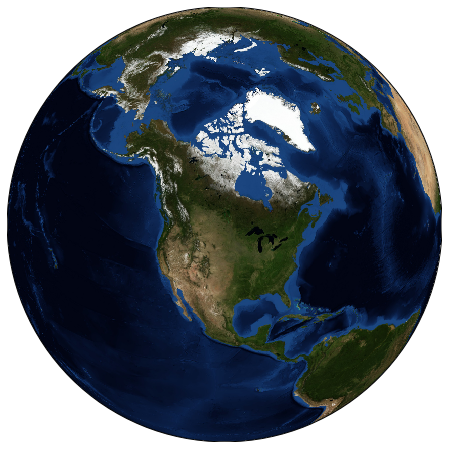

In [50]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


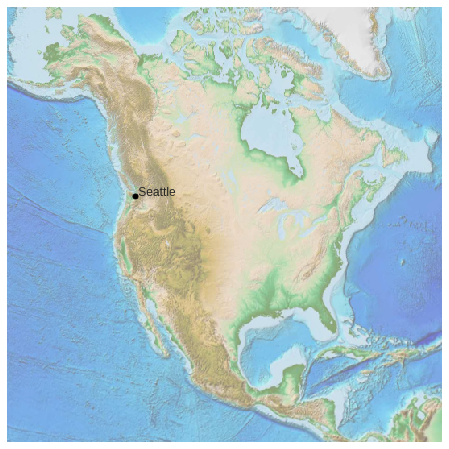

In [51]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

## Quick References<a id="29"></a>
<mark>[Return Contents](#0)
<hr>

**Line-styles References**<a id="30"></a>

<mark>[Return Contents](#0)
<hr>

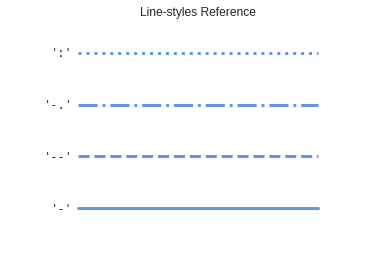

In [52]:
color = 'cornflowerblue'
points = np.ones(5)  # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()


# Plot all line styles.
fig, ax = plt.subplots()

linestyles = ['-', '--', '-.', ':']
for y, linestyle in enumerate(linestyles):
    ax.text(-0.1, y, repr(linestyle), **text_style)
    ax.plot(y * points, linestyle=linestyle, color=color, linewidth=3)
    format_axes(ax)
    ax.set_title('Line-styles Reference')

plt.show()

**Line styles**<a id="31"></a>

<mark>[Return Contents](#0)
<hr>

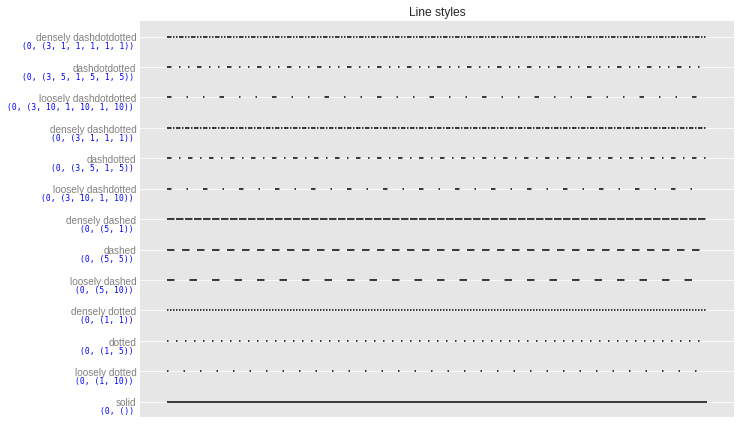

In [53]:
from collections import OrderedDict
from matplotlib.transforms import blended_transform_factory

linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])


plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)

X, Y = np.linspace(0, 100, 10), np.zeros(10)
for i, (name, linestyle) in enumerate(linestyles.items()):
    ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')

ax.set_ylim(-0.5, len(linestyles)-0.5)
plt.yticks(np.arange(len(linestyles)), linestyles.keys())
plt.xticks([])

# For each line style, add a text annotation with a small offset from
# the reference point (0 in Axes coords, y tick value in Data coords).
reference_transform = blended_transform_factory(ax.transAxes, ax.transData)
for i, (name, linestyle) in enumerate(linestyles.items()):
    ax.annotate(str(linestyle), xy=(0.0, i), xycoords=reference_transform,
                xytext=(-6, -12), textcoords='offset points', color="blue",
                fontsize=8, ha="right", family="monospace")
ax.set_title('Line styles')
plt.tight_layout()
plt.show()

**Fill style**<a id="32"></a>

<mark>[Return Contents](#0)
<hr>

In [54]:
from matplotlib.lines import Line2D


points = np.ones(5)  # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(color='cornflowerblue', linestyle=':', marker='o',
                    markersize=15, markerfacecoloralt='gray')


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()


fig, ax = plt.subplots()

# Plot all fill styles.
for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), **text_style)
    ax.plot(y * points, fillstyle=fill_style, **marker_style)
    format_axes(ax)
    ax.set_title('fill style')

plt.show()

**Un-filled markers**<a id="33"></a>

<mark>[Return Contents](#0)
<hr>

In [55]:
points = np.ones(3)  # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    mfc="C0", mec="C0")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def nice_repr(text):
    return repr(text).lstrip('u')


def math_repr(text):
    tx = repr(text).lstrip('u').strip("'").strip("$")
    return r"'\${}\$'".format(tx)


def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])

In [56]:
fig, axes = plt.subplots(ncols=2)
fig.suptitle('un-filled markers', fontsize=14)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)

plt.show()

**Filled markers**<a id="34"></a>

<mark>[Return Contents](#0)
<hr>

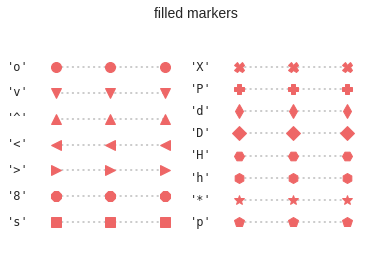

In [57]:
fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()

**Special Marker**<a id="35"></a>

<mark>[Return Contents](#0)
<hr>

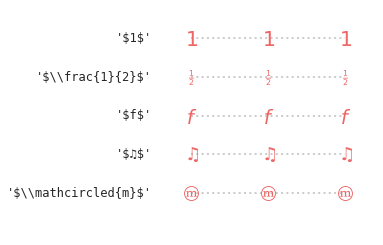

In [58]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.4)

marker_style.update(mec="None", markersize=15)
markers = ["$1$", r"$\frac{1}{2}$", "$f$", "$\u266B$",
           r"$\mathcircled{m}$"]

for y, marker in enumerate(markers):
    ax.text(-0.5, y, math_repr(marker), **text_style)
    ax.plot(y * points, marker=marker, **marker_style)
format_axes(ax)

plt.show()

**Colors**<a id="36"></a>

<mark>[Return Contents](#0)
<hr>

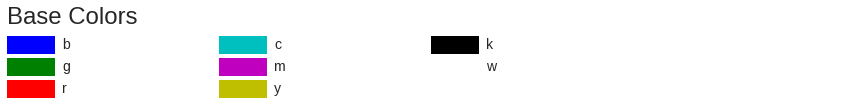

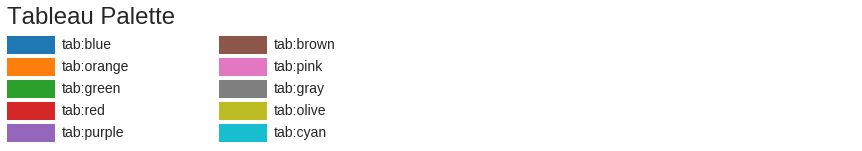

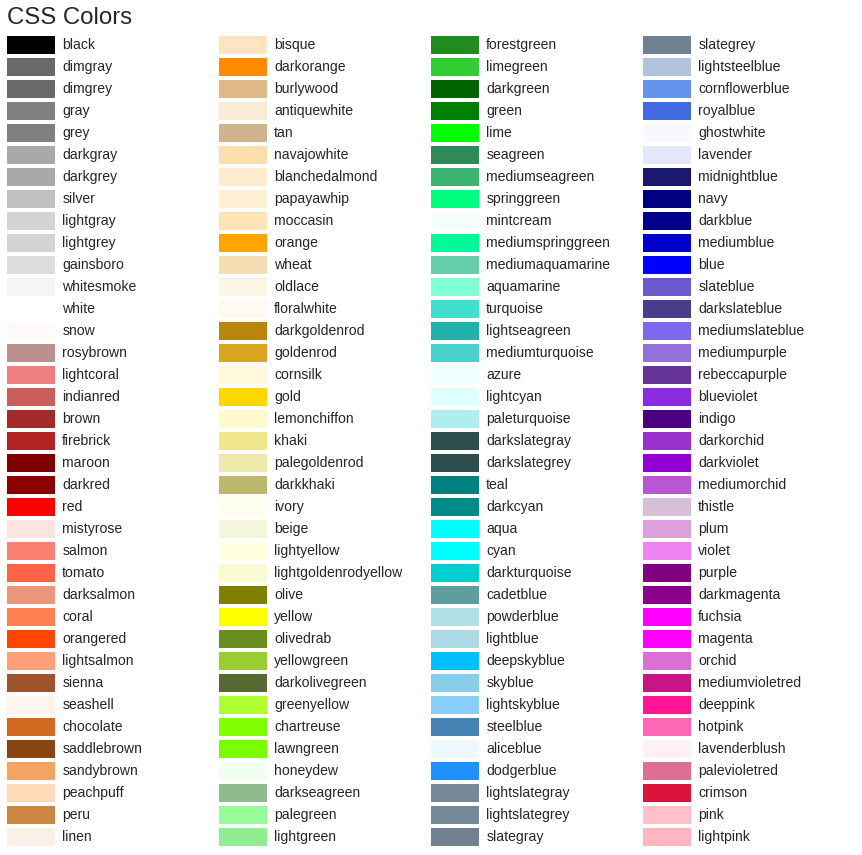

In [59]:
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    by_hsv = ((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                    for name, color in colors.items())
    if sort_colors is True:
        by_hsv = sorted(by_hsv)
    names = [name for hsv, name in by_hsv]

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

#sphinx_gallery_thumbnail_number = 3
plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
#xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
#xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

## Matplotlib for Pokemon Dataset<a id="37"></a>

<mark>[Return Contents](#0)
<hr>

**Bar Chart**<a id="38"></a>

<mark>[Return Contents](#0)
<hr>

In [60]:
# Bar Chart
type1Names = df['Type 1'].value_counts().index
type1Values = df['Type 1'].value_counts().values

plt.figure(figsize=(10,10))
plt.ylabel('Values', fontsize='medium')
plt.xlabel('Type 1', fontsize='medium')
plt.title('Top 20 Pokemon Type 1')
plt.bar(type1Names[:10],type1Values[:10], width = 0.7, color="blue",linewidth=0.4)
plt.show()

**Horizontal Bar Chart**<a id="39"></a>

<mark>[Return Contents](#0)
<hr>

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
plt.ylabel('Type 1', fontsize='medium')
plt.xlabel('Values', fontsize='medium')
plt.title('Top 20 Pokemon Type 1')
plt.style.use('fivethirtyeight')
ax.barh(type1Names[:5], type1Values[:5],color="blue")
plt.show()

**Stacked Bar Chart**<a id="40"></a>

<mark>[Return Contents](#0)
<hr>

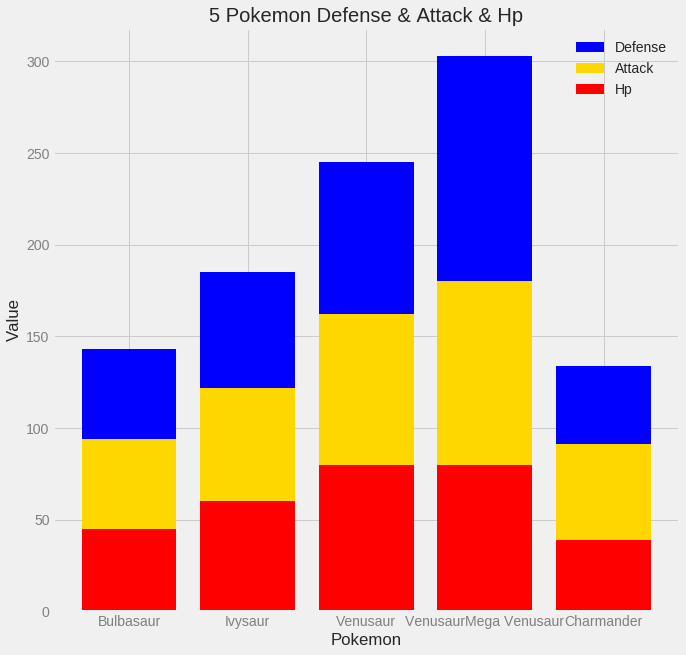

In [62]:
# Stacked Bar Chart
pokemon = df['Name'][:5]
hp = df['HP'][:5]
attack = df['Attack'][:5]
defense = df['Defense'][:5]
ind = [x for x, _ in enumerate(pokemon)]

plt.figure(figsize=(10,10))
plt.bar(ind, defense, width=0.8, label='Defense', color='blue', bottom=attack+hp)
plt.bar(ind, attack, width=0.8, label='Attack', color='gold', bottom=hp)
plt.bar(ind, hp, width=0.8, label='Hp', color='red')

plt.xticks(ind, pokemon)
plt.ylabel("Value")
plt.xlabel("Pokemon")
plt.legend(loc="upper right")
plt.title("5 Pokemon Defense & Attack & Hp")

plt.show()

**Group Bar Chart**<a id="41"></a>

<mark>[Return Contents](#0)
<hr>

In [63]:
N = 5
pokemon_hp = df['HP'][:5]
pokemon_attack = df['Attack'][:5]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, pokemon_hp, width, label='HP')
plt.bar(ind + width, pokemon_attack, width,label='Attack')

plt.ylabel('Values')
plt.title('Pokemon Hp & Attack')

plt.xticks(ind + width / 2, (df['Name'][:5]),rotation=45)
plt.legend(loc='best')
plt.show()

**Basic Pie Chart**<a id="42"></a>

<mark>[Return Contents](#0)
<hr>

In [64]:
# Pie Chart
plt.figure(1, figsize=(8,8))
df['Type 1'].value_counts().head(5).plot.pie(autopct="%1.1f%%")
plt.legend()
plt.show()

**Other Basic Pie Chart**<a id="43"></a>

<mark>[Return Contents](#0)
<hr>

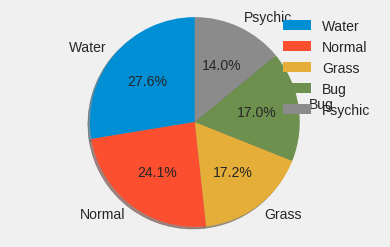

In [65]:
# Pie chart

fig1, ax1 = plt.subplots()
ax1.pie(type1Values[:5], labels=type1Names[:5], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

**Pie Chart with Label**<a id="44"></a>

<mark>[Return Contents](#0)
<hr>

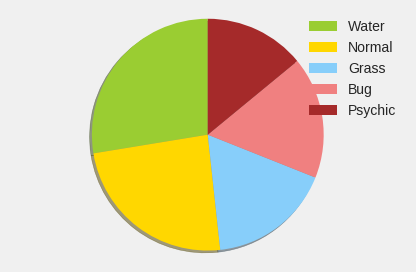

In [66]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','brown']
patches, texts = plt.pie(type1Values[:5], colors=colors, shadow=True, startangle=90)
plt.legend(patches, type1Names[:5], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

**Nested Pie Chart**<a id="45"></a>

<mark>[Return Contents](#0)
<hr>

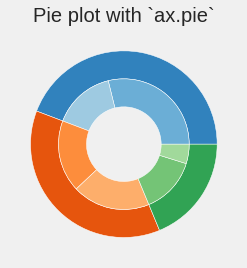

In [67]:
# nested pie chart
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

## Legend Example<a id="46"></a>

<mark>[Return Contents](#0)
<hr>

**Legend Underside**<a id="47"></a>

<mark>[Return Contents](#0)
<hr>

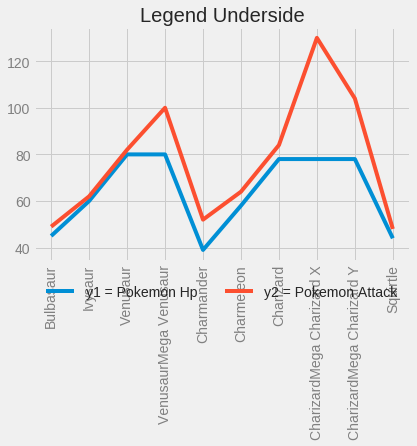

In [68]:
y1 = df['HP'][:10]
y2 = df['Attack'][:10]
x = df['Name'][:10]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y1, label='y1 = Pokemon Hp')
ax.plot(x, y2, label='y2 = Pokemon Attack')
plt.title('Legend Underside')
plt.xticks(rotation=90)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

**Legend Inside**<a id="48"></a>

<mark>[Return Contents](#0)
<hr>

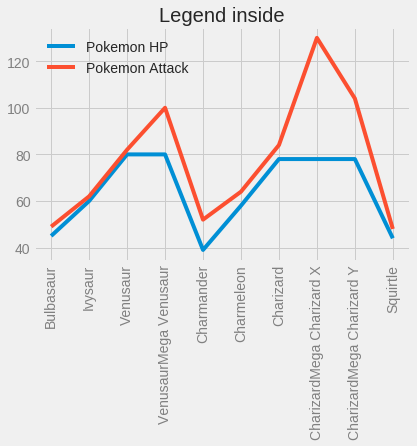

In [69]:
y1 = df['HP'][:10]
y2 = df['Attack'][:10]
x = df['Name'][:10]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y1, label='Pokemon HP')
ax.plot(x, y2, label='Pokemon Attack')
plt.title('Legend inside')
plt.xticks(rotation=90)
ax.legend()
plt.show()

**Legend Inside - 2**<a id="49"></a>

<mark>[Return Contents](#0)
<hr>

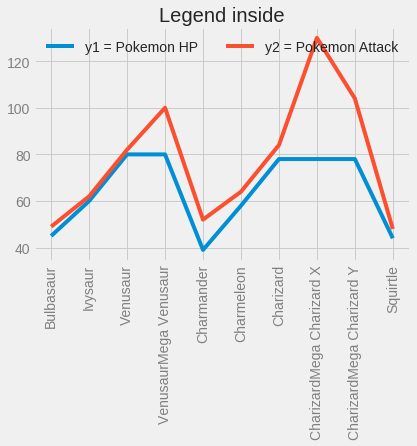

In [70]:
y1 = df['HP'][:10]
y2 = df['Attack'][:10]
x = df['Name'][:10]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y1, label='y1 = Pokemon HP')
ax.plot(x, y2, label='y2 = Pokemon Attack')
plt.title('Legend inside')
plt.xticks(rotation=90)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

**Legend Outside**<a id="50"></a>

<mark>[Return Contents](#0)
<hr>

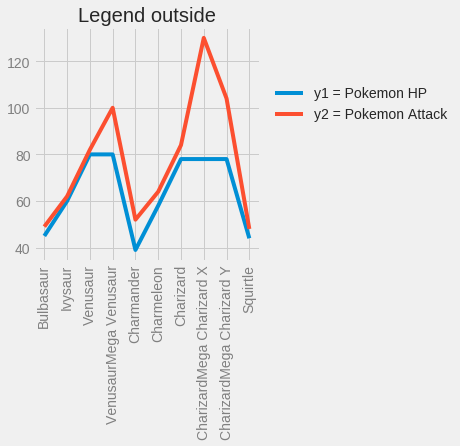

In [71]:
y1 = df['HP'][:10]
y2 = df['Attack'][:10]
x = df['Name'][:10]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y1, label='y1 = Pokemon HP')
ax.plot(x, y2, label='y2 = Pokemon Attack')
plt.title('Legend outside')
chartBox = ax.get_position()
plt.xticks(rotation=90)
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

**Scatter Plot**<a id="51"></a>

<mark>[Return Contents](#0)
<hr>

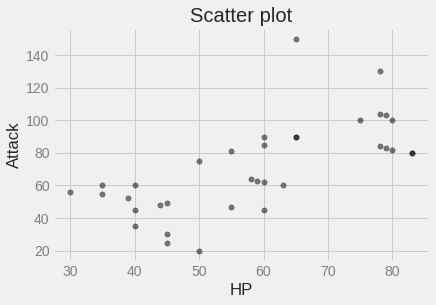

In [72]:
# Create data
x = df['HP'][:35]
y = df['Attack'][:35]
colors = (0,0,0)
area = np.pi*9
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('HP')
plt.ylabel('Attack')
plt.show()

**Histogram**<a id="52"></a>

<mark>[Return Contents](#0)
<hr>

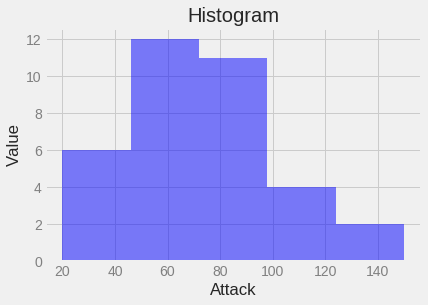

In [73]:
#Histogram
x = df['Attack'][:35]
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Histogram')
plt.xlabel('Attack')
plt.ylabel('Value')
plt.show()

**Stackplot**<a id="53"></a>

<mark>[Return Contents](#0)
<hr>

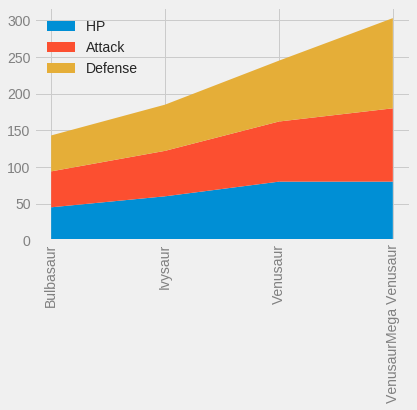

In [74]:
# Stackplot
x = df['Name'][:4]
y1 = df['HP'][:4]
y2 = df['Attack'][:4]
y3 = df['Defense'][:4]

labels = ["HP ", "Attack", "Defense"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3)
ax.legend(loc='upper left', labels=labels)
plt.xticks(rotation=90)
plt.show()

**2 Subplot**<a id="54"></a>

<mark>[Return Contents](#0)
<hr>

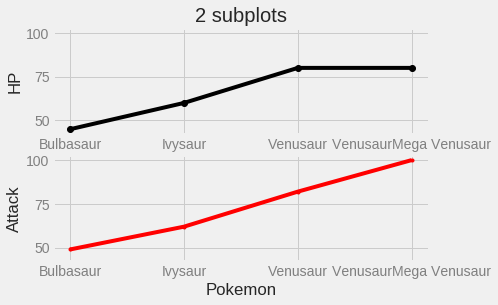

In [75]:
# Basic Subplot
# Data for plotting
x1 = df['Name'][:4]
x2 = df['Name'][:4]
y1 = df['HP'][:4]
y2 = df['Attack'][:4]

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharey=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='2 subplots', ylabel='HP')

ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='Pokemon', ylabel='Attack')

plt.show()

**3 Subplot**<a id="55"></a>

<mark>[Return Contents](#0)
<hr>

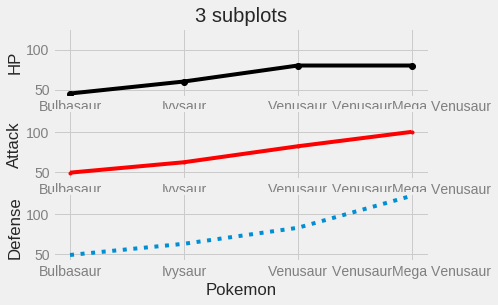

In [76]:
# Basic Subplot
# Data for plotting
x1 = df['Name'][:4]
x2 = df['Name'][:4]
x3 = df['Name'][:4]
y1 = df['HP'][:4]
y2 = df['Attack'][:4]
y3 = df['Defense'][:4]

# Create two subplots sharing y axis
fig, (ax1, ax2,ax3) = plt.subplots(3, sharey=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='3 subplots', ylabel='HP')

ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='Pokemon', ylabel='Attack')

ax3.plot(x3, y3, ':')
ax3.set(xlabel='Pokemon', ylabel='Defense')

plt.show()

**Color plot bar**<a id="56"></a>

<mark>[Return Contents](#0)
<hr>

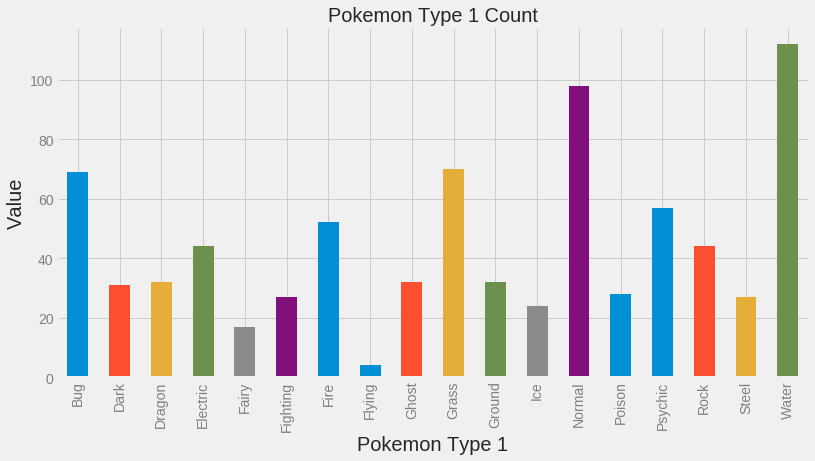

In [77]:
ax = df['Type 1'].value_counts().sort_index().plot.bar(figsize = (12,6),fontsize = 14)
ax.set_title("Pokemon Type 1 Count", fontsize = 20)
ax.set_xlabel("Pokemon Type 1", fontsize = 20)
ax.set_ylabel("Value", fontsize = 20)

plt.show()

**Linear Graph**<a id="57"></a>

<mark>[Return Contents](#0)
<hr>

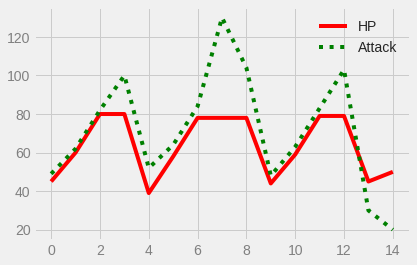

In [78]:
plt.plot(df['HP'][:15], '-r')
plt.plot(df['Attack'][:15], ':g')
plt.legend()

plt.show()

**Multiple figures**<a id="58"></a>

<mark>[Return Contents](#0)
<hr>

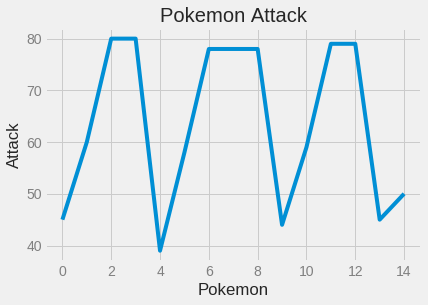

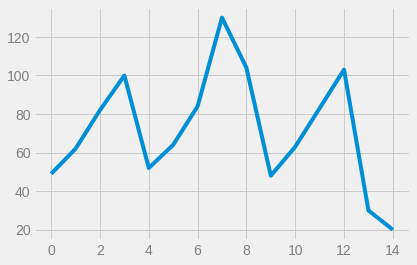

In [79]:
data = df['HP'][:15]
plt.title('Pokemon HP')
plt.xlabel('Pokemon')
plt.ylabel('HP')
plt.plot(data)

data2 = df['Attack'][:15]
plt.title('Pokemon Attack')
plt.xlabel('Pokemon')
plt.ylabel('Attack')
plt.figure()
plt.plot(data2)

plt.show()

## Conclucion<a id="59"></a>
<mark>[Return Contents](#0)
<hr>
* If you like it, thank you for you **upvotes**.
* If you have any question, I will happy to hear it

## Reference<a id="60"></a>

<mark>[Return Contents](#0)
<hr>

* [https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html](http://)
* [https://www.stat.berkeley.edu/~nelle/teaching/2017-visualization/README.html](http://)
* [https://realpython.com/python-matplotlib-guide/](http://)
* https://matplotlib.org/index.html
* http://benalexkeen.com/blog/